In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_excel('/content/drive/MyDrive/deepLearning/household power consumption.xlsx',
                   parse_dates={'dt':['Date','Time']},index_col='dt',
                   
                   na_values={'?'})
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
data.shape

(1048575, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2006-12-16 17:24:00 to 2008-12-13 21:38:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1044506 non-null  float64
 1   Global_reactive_power  1044506 non-null  float64
 2   Voltage                1044506 non-null  float64
 3   Global_intensity       1044506 non-null  float64
 4   Sub_metering_1         1044506 non-null  float64
 5   Sub_metering_2         1044506 non-null  float64
 6   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7)
memory usage: 64.0 MB


In [ ]:
data.isnull().sum()

Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
dtype: int64

In [ ]:
data=data.fillna(method='ffill')

In [ ]:
df=data.resample('D').sum()
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2008-12-09,1392.762,178.298,345554.37,5968.2,1867.0,402.0,8738.0
2008-12-10,1907.940,161.806,345818.22,8085.8,2561.0,5822.0,7171.0
2008-12-11,2190.286,159.172,346156.63,9145.8,1066.0,2752.0,9430.0


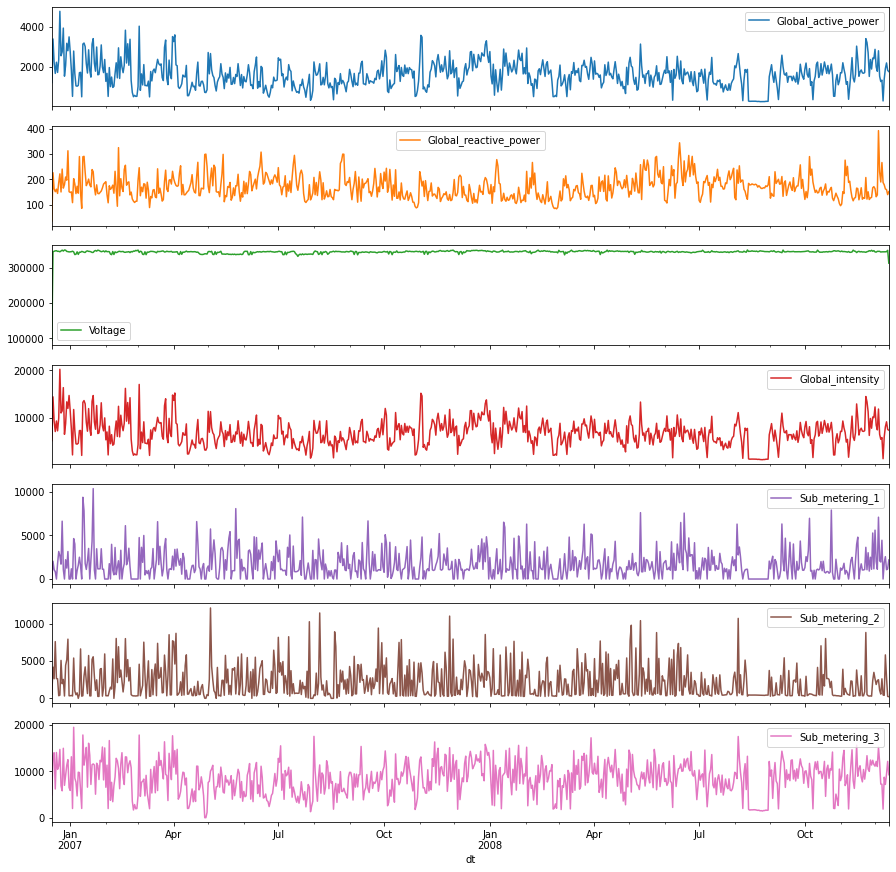

In [ ]:
df.plot(figsize=(15,15),subplots=True)

plt.show()

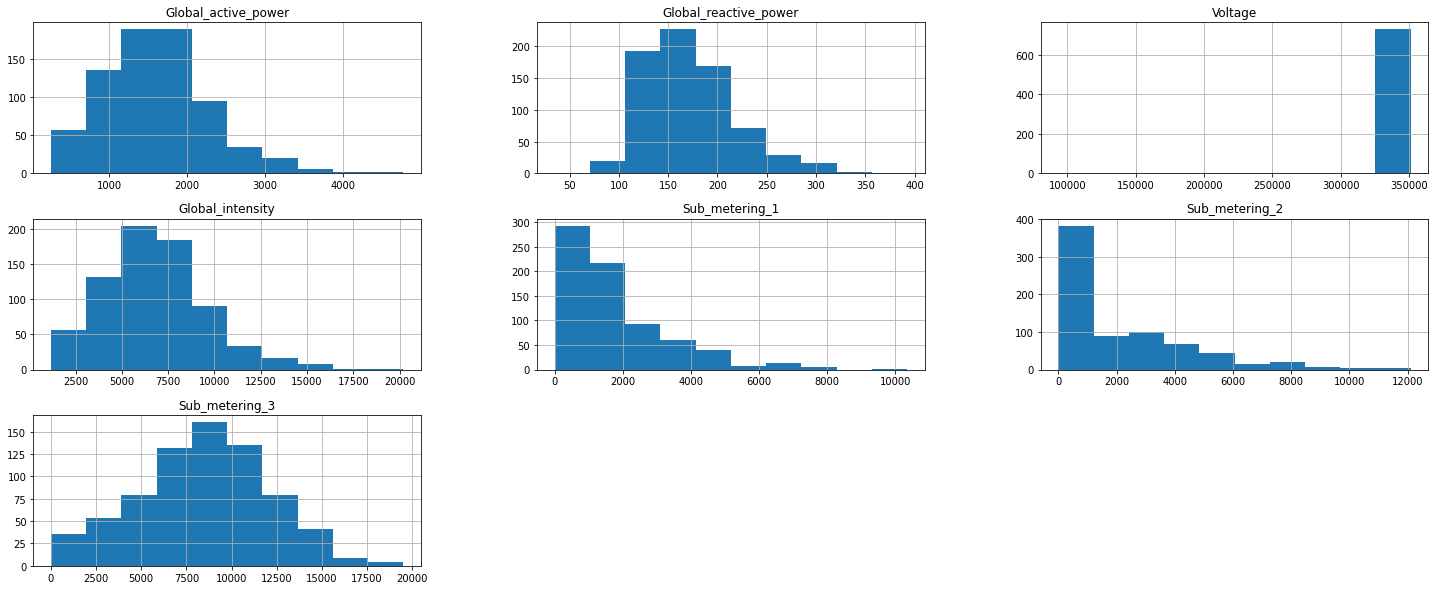

In [ ]:
df.hist(figsize=(25,10))

plt.show()

In [ ]:
import statsmodels.tsa.stattools as sts

sts.adfuller(df.Global_active_power)

(-6.42495182681019,
 1.753882631037162e-08,
 7,
 721,
 {'1%': -3.4394522667904153,
  '5%': -2.8655569894909805,
  '10%': -2.568909106765338},
 10957.788152311627)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

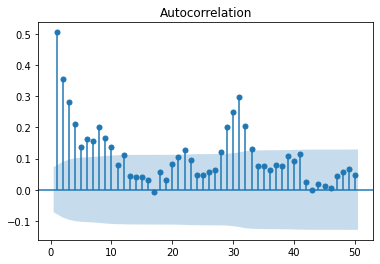

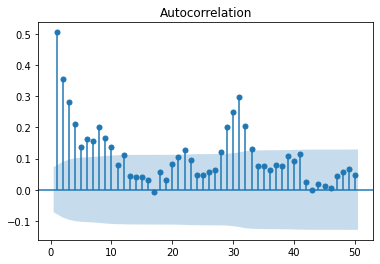

In [ ]:
plot_acf(df.Global_active_power,lags=50,zero=False)



In [ ]:
lag=7

In [ ]:
train_split = int(len(df)*0.8)

In [ ]:
train_split

583

In [ ]:
df=np.array(df)

target = Global_active

start_index = 0

end_index = size_train_data

history_size = lag

target_size = n_step

STEP = 1

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)


In [ ]:
n_step = 1

In [ ]:
past_history = lag
n_step= 1
STEP = 1

x_train_single, y_train_single = multivariate_data(df, df[:, 0], 0,
                                                   train_split, past_history,
                                                   n_step, STEP,
                                                   single_step=True)
x_test_single, y_test_single = multivariate_data(df, df[:, 0],
                                               train_split, None, past_history,
                                               n_step, STEP,
                                               single_step=True)

In [ ]:
print(x_train_single.shape)
print(x_test_single.shape)

(576, 7, 7)
(138, 7, 7)


In [ ]:
print(y_train_single.shape)
print(y_test_single.shape)

(576,)
(138,)


In [ ]:
x_train_single[0,:,0:7]

array([[1.2091760e+03, 3.4922000e+01, 9.3552530e+04, 5.1808000e+03,
        0.0000000e+00, 5.4600000e+02, 4.9260000e+03],
       [3.3904600e+03, 2.2600600e+02, 3.4572532e+05, 1.4398600e+04,
        2.0330000e+03, 4.1870000e+03, 1.3341000e+04],
       [2.2038260e+03, 1.6179200e+02, 3.4737364e+05, 9.2472000e+03,
        1.0630000e+03, 2.6210000e+03, 1.4018000e+04],
       [1.6661940e+03, 1.5094200e+02, 3.4847901e+05, 7.0940000e+03,
        8.3900000e+02, 7.6020000e+03, 6.1970000e+03],
       [2.2257480e+03, 1.6099800e+02, 3.4892361e+05, 9.3130000e+03,
        0.0000000e+00, 2.6480000e+03, 1.4063000e+04],
       [1.7171120e+03, 1.4416600e+02, 3.4710089e+05, 7.2406000e+03,
        1.7650000e+03, 2.6230000e+03, 1.0421000e+04],
       [2.3413380e+03, 1.8690600e+02, 3.4730575e+05, 9.8970000e+03,
        3.1510000e+03, 3.5000000e+02, 1.1131000e+04]])

In [ ]:
#scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalers = {}
for i in range(x_train_single.shape[1]):
    scalers [i]= MinMaxScaler(feature_range=(0,1))
    x_train_single[:, i, :] = scalers[i].fit_transform(x_train_single[:, i, :]) 

for i in range(x_test_single.shape[1]):
    x_test_single[:, i, :] = scalers[i].transform(x_test_single[:, i, :]) 

In [ ]:
x_train_single[0,:,0:7]

array([[0.1994623 , 0.        , 0.        , 0.1973365 , 0.        ,
        0.04509043, 0.25249885],
       [0.68938856, 0.54689846, 0.70973302, 0.6899456 , 0.19650106,
        0.34577587, 0.68383823],
       [0.42286519, 0.30089797, 0.8000126 , 0.41464927, 0.10274502,
        0.21645057, 0.71854016],
       [0.30211061, 0.25933219, 0.86055444, 0.29957995, 0.08109414,
        0.62779751, 0.31764826],
       [0.42778897, 0.2978562 , 0.88490548, 0.41816569, 0.        ,
        0.21868032, 0.72084679],
       [0.31354702, 0.23337369, 0.7850739 , 0.30741441, 0.17059733,
        0.21661574, 0.53416372],
       [0.45375101, 0.3971084 , 0.79629422, 0.44937527, 0.30456215,
        0.02890412, 0.57055718]])

In [ ]:
x_train_single.shape[-2:]

(7, 7)

In [ ]:
#scaling y

y_train_single=y_train_single.reshape(-1,1)

y_test_single=y_test_single.reshape(-1,1)


scaler =MinMaxScaler(feature_range=(0,1))
y_train_single=scaler.fit_transform(y_train_single)
y_test_single=scaler.transform(y_test_single)

In [ ]:
#simple RNN

In [ ]:
from keras.models import Sequential

from keras.layers import LSTM,Dense,GRU,SimpleRNN,Conv1D,MaxPooling1D,Flatten,Dropout

In [ ]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50,input_shape=x_train_single.shape[-2:],activation='relu',return_sequences=True,kernel_regularizer='l2'))
RNN_model.add(Dropout(0.3))

RNN_model.add(SimpleRNN(50,activation='relu',kernel_regularizer='l2'))
RNN_model.add(Dropout(0.3))

RNN_model.add(Dense(n_step,activation='selu'))

RNN_model.compile(optimizer='adam', loss='mse')

In [ ]:
history=RNN_model.fit(x_train_single,y_train_single,epochs=100,batch_size=16,
              validation_data=(x_test_single,y_test_single))




Epoch 1/100
36/36 [==============================] - 4s 25ms/step - loss: 0.6075 - val_loss: 0.4980
Epoch 2/100
36/36 [==============================] - 0s 9ms/step - loss: 0.4443 - val_loss: 0.3842
Epoch 3/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3378 - val_loss: 0.2949
Epoch 4/100
36/36 [==============================] - 0s 10ms/step - loss: 0.2631 - val_loss: 0.2310
Epoch 5/100
36/36 [==============================] - 0s 9ms/step - loss: 0.2039 - val_loss: 0.1828
Epoch 6/100
36/36 [==============================] - 0s 10ms/step - loss: 0.1603 - val_loss: 0.1474
Epoch 7/100
36/36 [==============================] - 0s 9ms/step - loss: 0.1318 - val_loss: 0.1219
Epoch 8/100
36/36 [==============================] - 0s 10ms/step - loss: 0.1083 - val_loss: 0.1040
Epoch 9/100
36/36 [==============================] - 0s 9ms/step - loss: 0.0936 - val_loss: 0.0883
Epoch 10/100
36/36 [==============================] - 0s 10ms/step - loss: 0.0791 - val_loss: 0.0773
Epoc

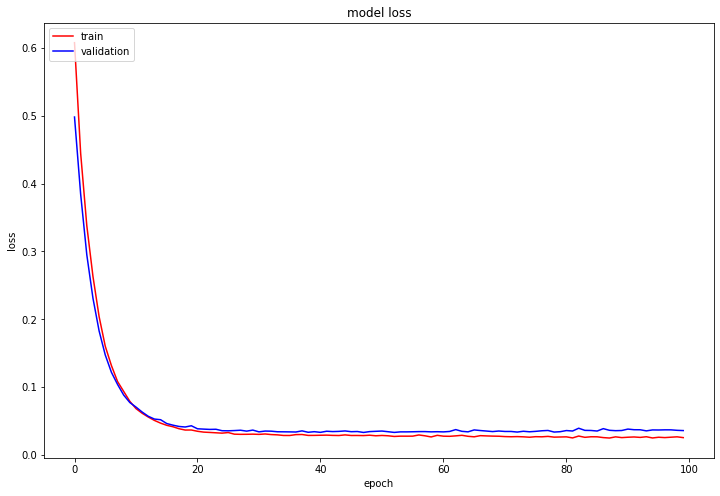

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(history.history['loss'], c='r')


plt.plot(history.history['val_loss'], c='b')

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train','validation'], loc='upper left')

plt.show()


In [ ]:
#predict test set

pred_rnn=RNN_model.predict(x_test_single)
                           


5/5 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

mse_rnn = mean_squared_error(y_test_single,pred_rnn)

In [ ]:
mse_rnn

0.032923556384482806

In [ ]:
#inverse Prediction

predict_RNN_inv = scaler.inverse_transform(pred_rnn)

y_test_inv = scaler.inverse_transform(y_test_single)

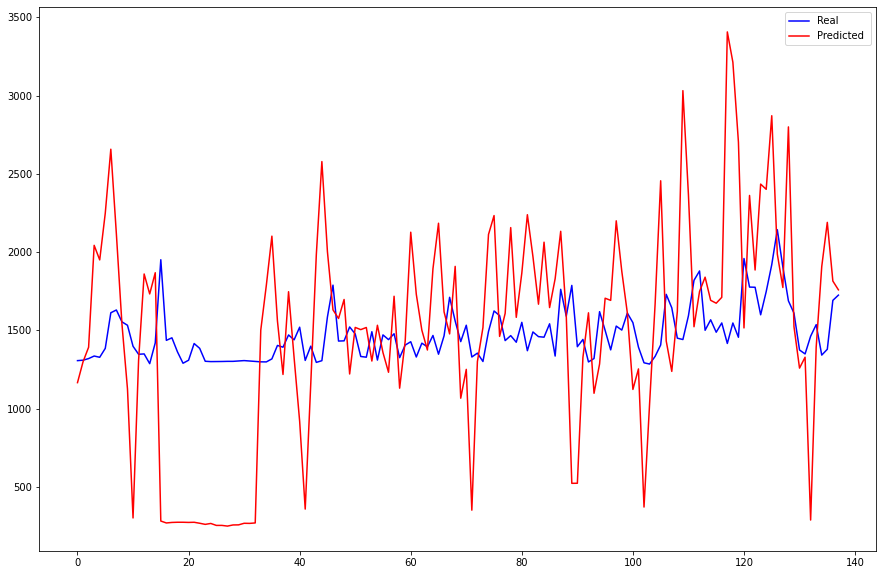

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(predict_RNN_inv, color='b', label='Real ')
plt.plot(y_test_inv, color='r', label='Predicted ')
plt.legend()
plt.show()

predict one step

In [ ]:
input_samples=x_test_single[-1:,:,:]

input_samples

array([[[ 0.27021901,  0.62780985,  0.98475542,  0.26826349,
          0.20123719,  0.08960277,  0.61299913],
        [ 0.21072756,  0.40624904,  0.67842118,  0.2128451 ,
          0.18857529,  0.04682468,  0.37141832],
        [ 0.22634207,  0.70058843,  0.70754438,  0.23216939,
          0.42876474,  0.21612024,  0.37064944],
        [-0.00721699,  0.39762941,  0.70667737, -0.00615641,
          0.        ,  0.03815344,  0.09452048],
        [ 0.24069654,  0.3641316 ,  0.70036998,  0.239416  ,
          0.18045621,  0.03319845,  0.44789584],
        [ 0.35640785,  0.30095161,  0.71482121,  0.35258281,
          0.24753528,  0.48079941,  0.36757394],
        [ 0.41982404,  0.29086089,  0.73335615,  0.40923034,
          0.10303499,  0.22726897,  0.48336665]]])

In [ ]:
next_step_rnn = RNN_model.predict(input_samples)

next_step_rnn

1/1 [==============================] - 0s 31ms/step


array([[0.37868363]], dtype=float32)

LSTm

In [ ]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(50,input_shape=x_train_single.shape[-2:],activation='relu',return_sequences=True))
LSTM_model.add(Dropout(0.3))

LSTM_model.add(LSTM(50,activation='relu',kernel_regularizer='l2'))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Dense(n_step,activation='selu'))
LSTM_model.compile(optimizer='adam', loss='mse')

In [ ]:
history_LSTM=LSTM_model.fit(x_train_single,y_train_single,
                                            epochs=100,batch_size=16,validation_data=(x_test_single,y_test_single))

Epoch 1/100
36/36 [==============================] - 5s 23ms/step - loss: 0.6562 - val_loss: 0.4337
Epoch 2/100
36/36 [==============================] - 0s 10ms/step - loss: 0.3159 - val_loss: 0.2190
Epoch 3/100
36/36 [==============================] - 0s 10ms/step - loss: 0.1618 - val_loss: 0.1180
Epoch 4/100
36/36 [==============================] - 0s 10ms/step - loss: 0.0910 - val_loss: 0.0714
Epoch 5/100
36/36 [==============================] - 0s 10ms/step - loss: 0.0580 - val_loss: 0.0515
Epoch 6/100
36/36 [==============================] - 0s 11ms/step - loss: 0.0467 - val_loss: 0.0463
Epoch 7/100
36/36 [==============================] - 0s 12ms/step - loss: 0.0393 - val_loss: 0.0414
Epoch 8/100
36/36 [==============================] - 0s 12ms/step - loss: 0.0368 - val_loss: 0.0382
Epoch 9/100
36/36 [==============================] - 0s 12ms/step - loss: 0.0345 - val_loss: 0.0372
Epoch 10/100
36/36 [==============================] - 0s 12ms/step - loss: 0.0345 - val_loss: 0.0359

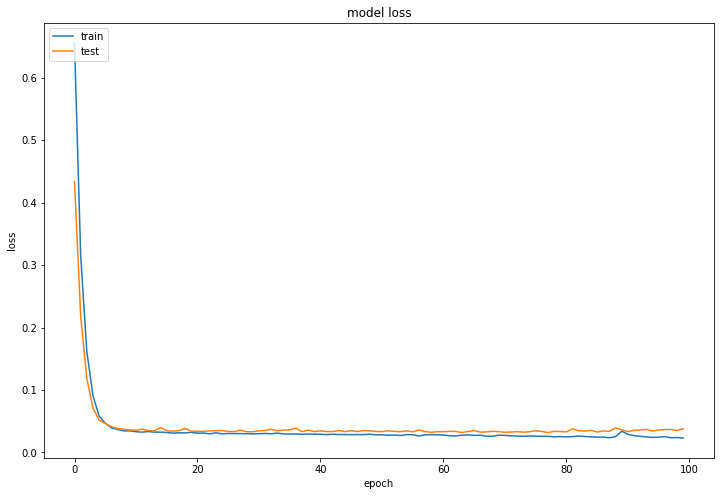

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred_lstm=LSTM_model.predict(x_test_single)



5/5 [==============================] - 0s 6ms/step


In [ ]:
mse_LSTM= mean_squared_error(y_test_single, pred_lstm)

In [ ]:
mse_LSTM

0.03711594788206806

In [ ]:
predict_LSTM_inv=scaler.inverse_transform(pred_lstm)

y_test_single_inv=scaler.inverse_transform(y_test_single)

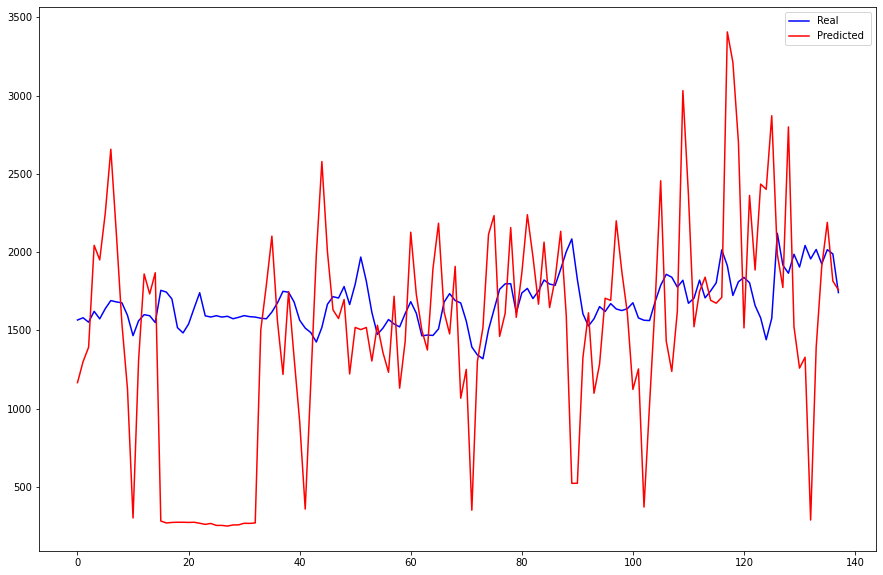

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(predict_LSTM_inv, color='b', label='Real ')
plt.plot(y_test_single_inv, color='r', label='Predicted ')
plt.legend()

In [ ]:
GRU_model = Sequential()
GRU_model.add(GRU(50,input_shape=x_train_single.shape[-2:],activation='relu',return_sequences=True,kernel_regularizer='l2'))
GRU_model.add(Dropout(0.3))

GRU_model.add(GRU(50,activation='relu',kernel_regularizer='l2'))
GRU_model.add(Dropout(0.3))

GRU_model.add(Dense(n_step,activation='selu'))
GRU_model.compile(optimizer='adam', loss='mse')

In [ ]:
history_GRU=GRU_model.fit(x_train_single,y_train_single,
                                            epochs=100,batch_size=16,validation_data=(x_test_single,y_test_single))

Epoch 1/100
36/36 [==============================] - 5s 27ms/step - loss: 0.7248 - val_loss: 0.5150
Epoch 2/100
36/36 [==============================] - 0s 11ms/step - loss: 0.3930 - val_loss: 0.2853
Epoch 3/100
36/36 [==============================] - 0s 13ms/step - loss: 0.2184 - val_loss: 0.1640
Epoch 4/100
36/36 [==============================] - 0s 11ms/step - loss: 0.1291 - val_loss: 0.1023
Epoch 5/100
36/36 [==============================] - 0s 13ms/step - loss: 0.0810 - val_loss: 0.0699
Epoch 6/100
36/36 [==============================] - 0s 13ms/step - loss: 0.0582 - val_loss: 0.0558
Epoch 7/100
36/36 [==============================] - 1s 19ms/step - loss: 0.0472 - val_loss: 0.0488
Epoch 8/100
36/36 [==============================] - 1s 21ms/step - loss: 0.0433 - val_loss: 0.0438
Epoch 9/100
36/36 [==============================] - 1s 25ms/step - loss: 0.0381 - val_loss: 0.0409
Epoch 10/100
36/36 [==============================] - 1s 24ms/step - loss: 0.0363 - val_loss: 0.0428

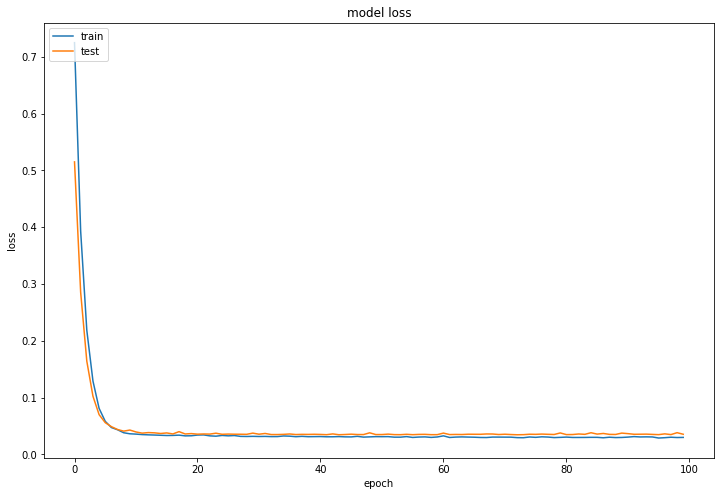

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predict_GRU=GRU_model.predict(x_test_single)

5/5 [==============================] - 1s 7ms/step


In [ ]:
mse_GRU= mean_squared_error(y_test_single, predict_GRU)

In [ ]:
mse_GRU

0.033966799128245864

In [ ]:
predict_GRU_inv=scaler.inverse_transform(predict_GRU)

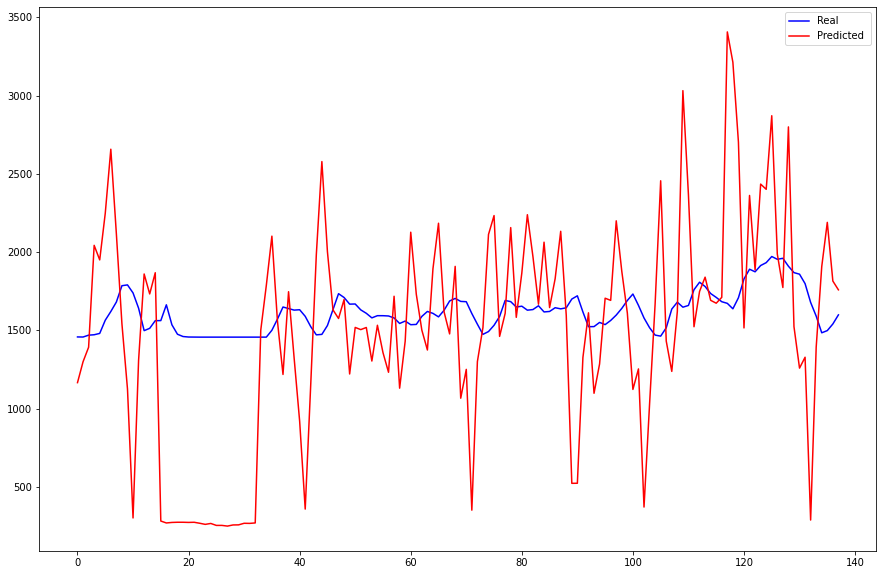

In [ ]:
fig = plt.figure(figsize = (15,10))
plt.plot(predict_GRU_inv, color='b', label='Real ')
plt.plot(y_test_single_inv, color='r', label='Predicted ')
plt.legend()

In [ ]:
from keras.layers import BatchNormalization